# Como um modelo convolucional vê?

Vamos treinar uma rede convolucional com o conjunto de dados Fashion-MNIST e visualizar os filtros e pooling.

### Importando as bibliotecas.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models

### Baixando a base de dados.

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (val_images, val_labels) = mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


### Redimensionando e escanolando os dados.

In [3]:
# Camadas convolucionais esperam que a entrada tenha 3 dimensões. Portanto, fazemos um reshape adicionando uma nova dimensão.
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.

# Camadas convolucionais esperam que a entrada tenha 3 dimensões. Portanto, fazemos um reshape adicionando uma nova dimensão.
val_images = val_images.reshape(10000, 28, 28, 1)
val_images = val_images/255.0

### Definição, compilação e treinamento do modelo.

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

model.fit(training_images, training_labels, validation_data=(val_images, val_labels), epochs=20)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 20)                3

# Visualizando as Convoluções e Pooling

A célula abaixo mostra graficamente as convoluções.

O `print(test_labels[:100])` mostra os primeiros 100 rótulos do conjunto de teste, e podemos ver que aqueles no índice 0, 23 e 28 têm todos o mesmo valor (9). Ou seja, são todos sapatos.

Vamos dar uma olhada no resultado da execução da convolução em cada um e veremos o surgimento das caracteristicas comuns entre eles.

Quando as camadas densas finais são treinadas nesses dados resultantes das camadas de convolução e pooling, elas estão trabalhando com muito menos dados e mais direcionadas: as características detectadas (ou filtradas) por essas camadas.

In [5]:
print(val_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


### Definindo uma função para plotar as figuras.

In [6]:
def show_image(img):
  plt.figure()
  plt.imshow(val_images[img].reshape(28, 28))
  plt.grid(False)
  plt.show()

No código abaixo, o modelo `activation_model` é uma versão do modelo original model que permite obter as saídas das camadas intermediárias do modelo, o que é útil para a visualização de ativações ou outras análises intermediárias durante o treinamento ou inferência do modelo.

Número de camadas: 7
1/1 [==============================] - 0s 17ms/step


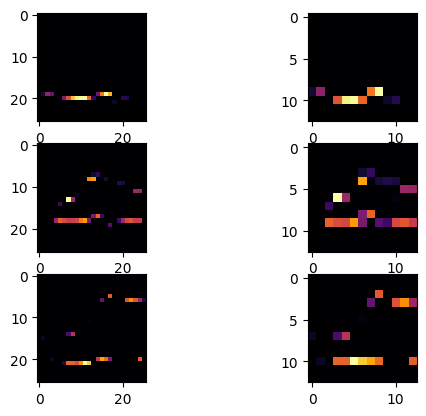

In [47]:
f, axarr = plt.subplots(3,2)

# Ao examinar a lista acima, vemos que as entradas 0, 23 e 28 têm rótulo igual a 9.
FIRST_IMAGE = 0
SECOND_IMAGE =23
THIRD_IMAGE = 28

# Para sapatos (0, 23, 28), FILTER_NUMBER=0 (ou seja, o primeiro filtro) mostra a sola sendo filtrada com muita clareza.
FILTER_NUMBER = 0

# Uma lista chamada layer_outputs é criada usando uma compreensão de lista.
# Ele itera por todas as camadas (layer) no modelo model e extrai as saídas de cada camada (layer.output).
# Portanto, layer_outputs será uma lista de tensores, onde cada tensor corresponde à saída de uma camada específica do modelo.
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

print('Número de camadas:', len(layer_outputs))

# O "for" abaixo é usado para plotar as saídas das duas primeiras camadas (Conv2D e MaxPooling)
# O índice 0 acessa a primeira camada Conv2D e o índice 1 acessa a primeira camada de MaxPooling.
for x in range(0, 2):
  f1 = activation_model.predict(val_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, FILTER_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(val_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, FILTER_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(val_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, FILTER_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [ ]:
show_image(FIRST_IMAGE)
show_image(SECOND_IMAGE)
show_image(THIRD_IMAGE)